# DBSCAN Clustering

`It mainly deal with non-linear dataset`

``It's also use for outlier``

DBSCAN is a density-based clustering algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space.
- **Arbitrary-Shaped Clusters:** Clusters can take any shape, not just circular or convex.
- **Noise and Outliers:** It effectively identifies and handles noise points without assigning them to any cluster.

![DBSCAN](https://media.geeksforgeeks.org/wp-content/uploads/20250129131304142658/Databases.webp)

## How Does DBSCAN Work? 
#### DBSCAN works by categorizing data points into three types:

- **core points**, which have a sufficient number of neighbors within a specified radius (eplison)
- **border points**, which are near core points but lack enough neighbors to be core points themselves
- **noise points**, which do not belong to any cluster.</br>
</br>By iteratively expanding clusters from core points and connecting density-reachable points, DBSCAN forms clusters without relying on rigid assumptions about their shape or size.

![DBSCAN](https://media.geeksforgeeks.org/wp-content/uploads/20190418023034/781ff66c-b380-4a78-af25-80507ed6ff26.jpeg)

## Silhouette Score in Clustering

The **Silhouette Score** is a metric used to evaluate the quality of clusters created by a clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from **-1** to **1**, where:

- **1** Best Clustering.
- **0** trends close ot good clustering
- **-1** Worst Clustering.<br><br>

- **1** indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- **0** indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- **-1** indicates that the object might have been assigned to the wrong cluster.

The Silhouette Score is calculated using the mean intra-cluster distance (*a*) and the mean nearest-cluster distance (*b*) for each sample. The formula is:

$$ \text{Silhouette Score} = \frac{b - a}{\max(a, b)} $$

### Example: Calculating the Silhouette Score in Python

Here’s an example of how to calculate the Silhouette Score using Python and the `sklearn` library:

```python
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Example data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
labels = dbscan.fit_predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')
```

### Explanation
- We create a dataset `X`.
- We apply the **DBSCAN** clustering algorithm.
- We calculate the **Silhouette Score** to evaluate the clustering quality.

This score helps in understanding how well the clusters are formed and can guide in tuning the parameters of the clustering algorithm.


![Image](https://github.com/user-attachments/assets/47e061c2-6eb1-45ac-accd-c45fa16e9e5b)

# Practical

In [537]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [538]:
# x,y = make_moons(n_samples=250,noise=0.05,random_state=42)
x, y = make_moons(n_samples=250, noise=0.05)


In [539]:
df = {"data1":x[:,0] , "data2":x[:,1]}

In [540]:
dataset = pd.DataFrame(df)
dataset.head()

,data1,data2
0,-0.962899,0.122834
1,-1.025947,0.333821
2,-0.690790,0.706631
3,-1.045930,0.183467
4,2.002078,0.091373


<Axes: xlabel='data1', ylabel='data2'>

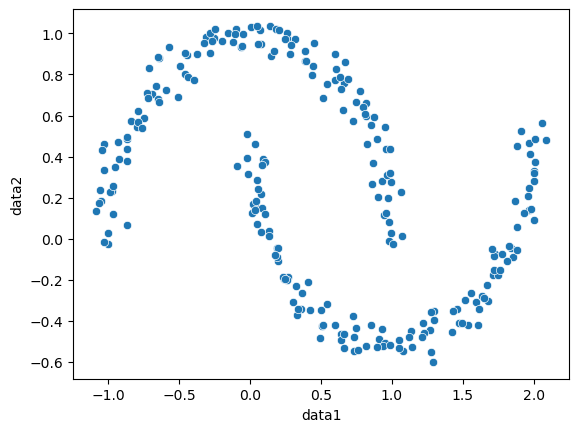

In [541]:
sns.scatterplot(x="data1",y="data2",data=dataset)

In [542]:
from sklearn.cluster import DBSCAN
dbs_can = DBSCAN(eps=0.2, min_samples=5)
dataset["predict"]=dbs_can.fit_predict(dataset)
dataset["predict"]

0      0
1      0
2      0
3      0
4      1
      ..
245    0
246    0
247    0
248    1
249    1
Name: predict, Length: 250, dtype: int64

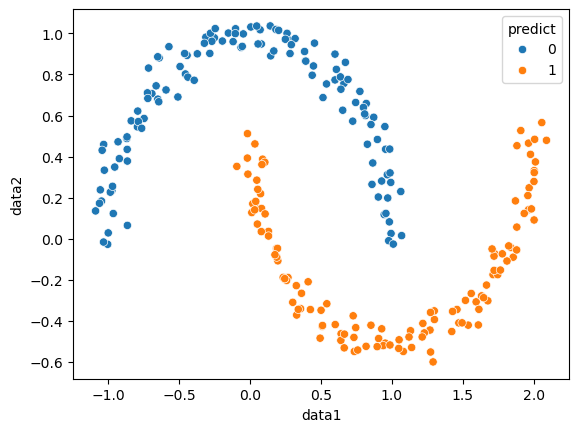

<Figure size 5000x3000 with 0 Axes>

In [543]:
sns.scatterplot(x="data1",y="data2",data=dataset,hue="predict")
plt.figure(figsize=(50,30))

plt.savefig("k-m.jpg", format='jpg',dpi=300)
plt.show()

In [544]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dataset, labels=dbs_can.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.4706986193689761


<Figure size 5000x3000 with 0 Axes>

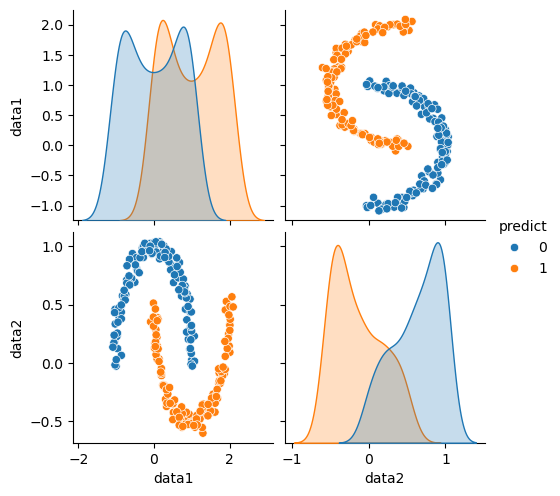

In [545]:
plt.figure(figsize=(50,30))
sns.pairplot(data=dataset,hue="predict")
plt.savefig("k-m1.jpg", format='jpg',dpi=300)
plt.show()

# Check Clusteing

In [546]:
from sklearn.cluster import KMeans

In [547]:
ss = []
noc = [j for j in range(2,21)]
for i in range(2,21):
    kmn = KMeans(n_clusters=i)
    kmn.fit(dataset)
    ss.append(silhouette_score(dataset,kmn.labels_))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

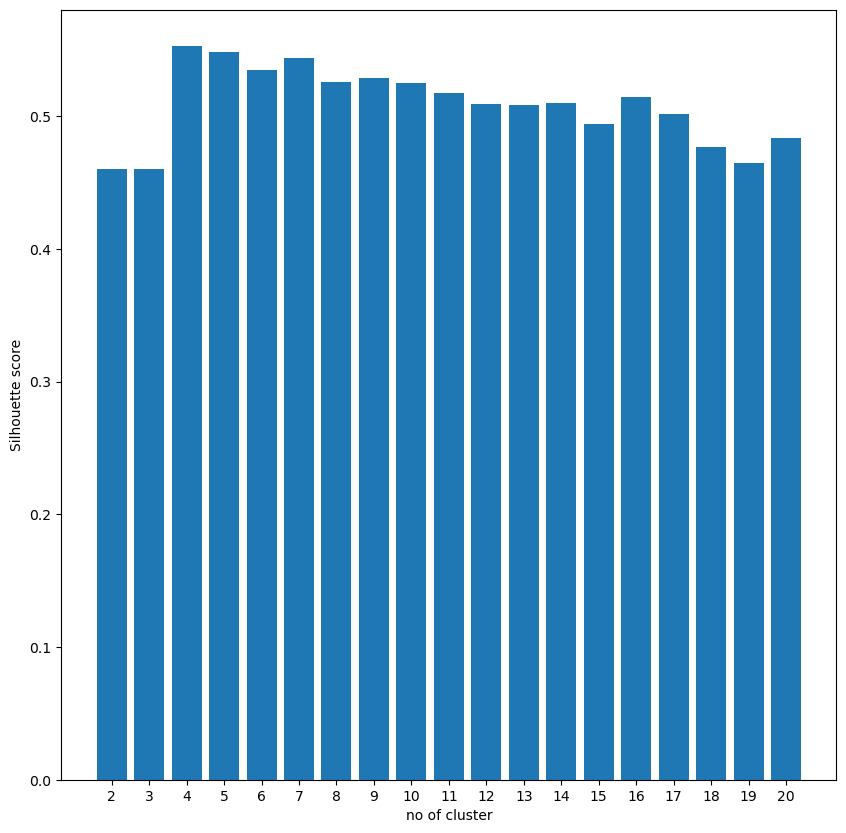

In [548]:
plt.figure(figsize=(10,10))
plt.bar(noc,ss)
plt.xlabel("no of cluster")
plt.xticks(noc)
plt.ylabel("Silhouette score")
plt.show()


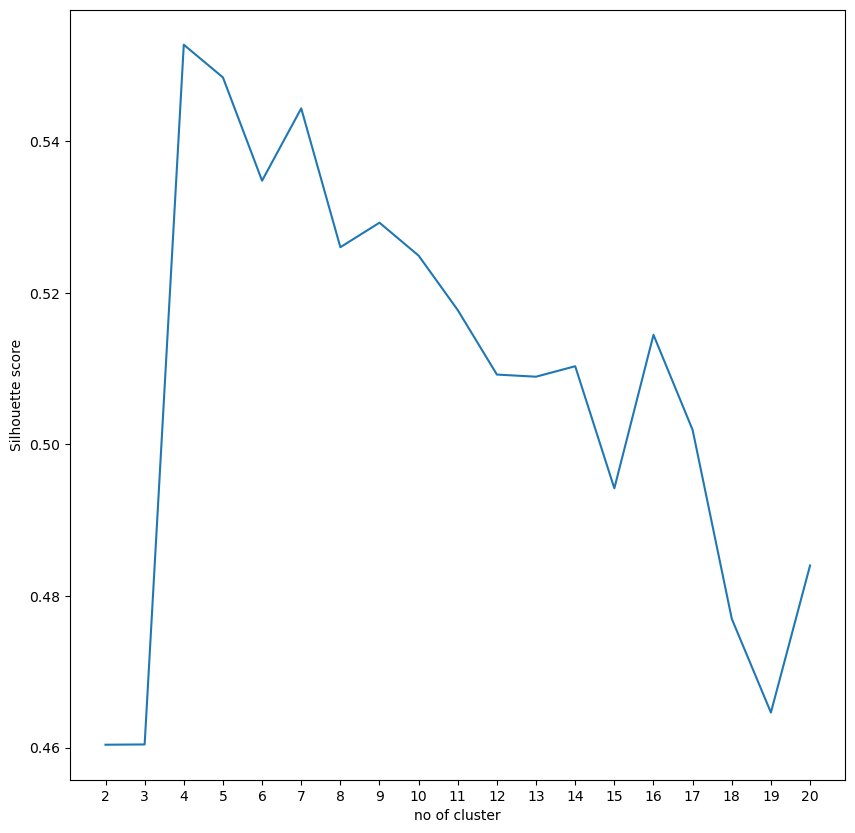

In [549]:
plt.figure(figsize=(10,10))
plt.plot(noc,ss)
plt.xlabel("no of cluster")
plt.xticks(noc)
plt.ylabel("Silhouette score")
plt.show()